## Dataset Overview
The analysis is based on the Healthcare dataset sourced from **Kaggle**. The dataset includes several key variables:

1. **Name**
   → Patient's full name.

2. **Age**
   → Patient's age (in years).

3. **Gender**
   → Patient's gender (e.g., Male, Female).

4. **Blood Type**
   → Blood group (e.g., A+, B-, O+).

5. **Medical Condition**
   → Diagnosed illness or health condition (e.g., Cancer, Flu).

6. **Date of Admission**
   → The date when the patient was admitted to the hospital.

7. **Doctor**
   → Name of the attending physician.

8. **Hospital**
   → Hospital or medical facility name.

9. **Insurance Provider**
   → Company providing health insurance (e.g., Blue Cross).

10. **Billing Amount**
    → Total cost billed for treatment or hospitalization.

11. **Room Number**
    → Hospital room assigned to the patient.

12. **Admission Type**
    → Nature of admission (e.g., Urgent, Routine).

13. **Discharge Date**
    → The date when the patient was discharged.

14. **Medication**
    → Drug(s) prescribed during treatment (e.g., Paracetamol).

15. **Test Results**
    → Outcome of medical tests (e.g., Normal, Abnormal).






###  **Objectives of the Analysis**

1. **Understand Patient Demographics**

   * Analyze age, gender, and blood type distributions.
   * Identify dominant patient groups (e.g., most common age range or blood group).

2. **Explore Medical Conditions**

   * Determine the most frequent medical conditions.
   * Identify trends or patterns in illness by age or gender.

3. **Analyze Hospital Admissions**

   * Track admission types (urgent vs. routine).
   * Analyze admission trends over time (daily, monthly, yearly).

4. **Examine Hospital Stays**

   * Calculate length of stay using admission and discharge dates.
   * Correlate length of stay with medical conditions or admission types.

5. **Medication Usage**
   * Identify the most commonly prescribed medications.
6. **Test Result Distribution**

   * Examine frequency of normal vs. abnormal test results.
   * Correlate test results with medical conditions or medications.

In [1]:
# import all required libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random 
from warnings import filterwarnings
filterwarnings ('ignore')
plt.rcParams['figure.figsize']=(15,15) 


In [2]:
# import data from CSV or Excel
df_health= pd.read_csv('Healthcare_dataset.csv')
df_health


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [3]:
# Check top 5 data
df_health.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
# Checking tail of data
df_health.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [5]:
# Check the shape of the data 


(55500, 15)

In [6]:
# Describing the Data
df_health.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
df_health.describe(include=object)

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [8]:
# checking if there are duplicate values or not
df_health.duplicated().sum()

534

In [12]:
df_health.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
55495    False
55496    False
55497    False
55498    False
55499    False
Length: 55500, dtype: bool

In [15]:
# Removing Duplicates
df_health.drop_duplicates(inplace=True)

In [39]:
df_health.duplicated().sum()

0

In [18]:
# Check if there are null values
df_health.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [19]:
# Check if there are null values by percentage
df_health.isnull().sum()/df_health.isnull().count()*100

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [20]:
# checking unique values
df_health['Name'].unique()

array(['Bobby JacksOn', 'LesLie TErRy', 'DaNnY sMitH', ...,
       'LiSa sIMPsoN', 'RoGER farRELl', 'kaTheRIne WeBSTer'], dtype=object)

## Using Boxplot for Checking Outliers

<Axes: >

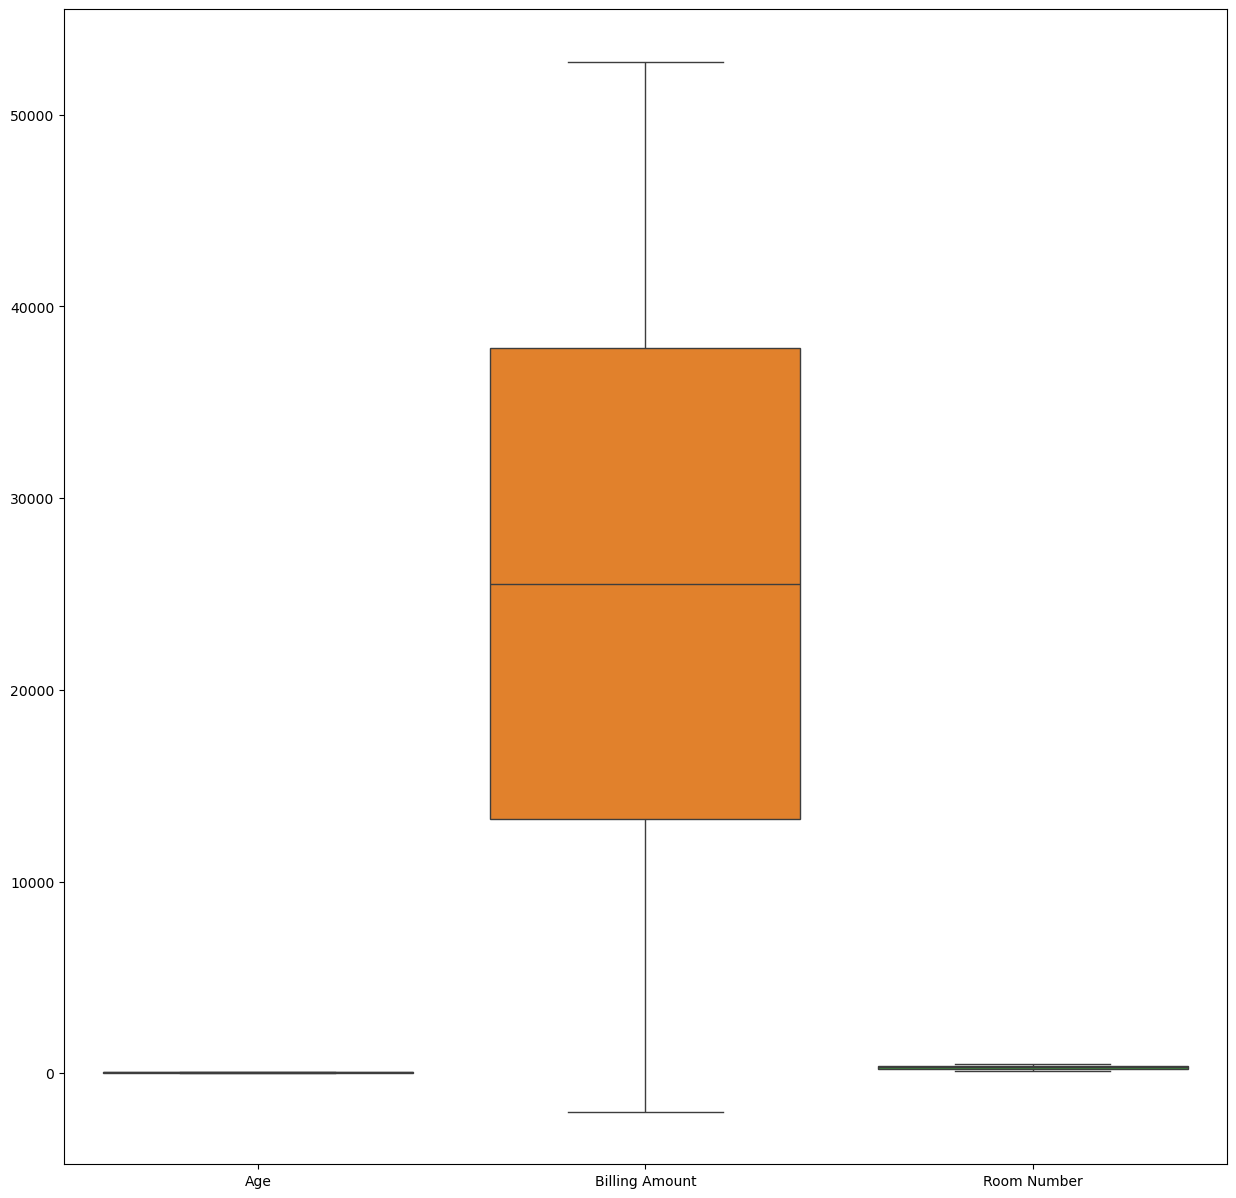

In [21]:
sns.boxplot(df_health)

## 
**Insights**
The above boxplot is created to identify any outliers in the dataset.

In [22]:
df_health.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal


In [23]:
# Making the new columns for Admission Year, Month and Date
df_health["Addmission_Year"]=df_health['Date of Admission'].apply(lambda x:int(x.split("-")[0]))
df_health["Addmission_Month"]=df_health['Date of Admission'].apply(lambda x:int(x.split("-")[1]))
df_health["Addmission_Date"]=df_health['Date of Admission'].apply(lambda x:int(x.split("-")[2]))


In [24]:
# Making the new columns for Discharge Year, Month and Date
df_health["Discharge_Year"]=df_health['Discharge Date'].apply(lambda x:int(x.split("-")[0]))
df_health["Discharge_Month"]=df_health['Discharge Date'].apply(lambda x:int(x.split("-")[1]))
df_health["Discharge_Date"]=df_health['Discharge Date'].apply(lambda x:int(x.split("-")[2]))


df_health.head(1) 

In [26]:
# Dropping the columns of Discharge Date, Date of Admission
df_health.drop(columns= ['Discharge Date','Date of Admission'],inplace= True)

In [27]:
df_health.head(1) 

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Addmission_Year,Addmission_Month,Addmission_Date,Discharge_Year,Discharge_Month,Discharge_Date
0,Bobby JacksOn,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2024,1,31,2024,2,2


In [46]:
df_health.shape

(54966, 21)

## EDA -----> Exploratory Data analysis

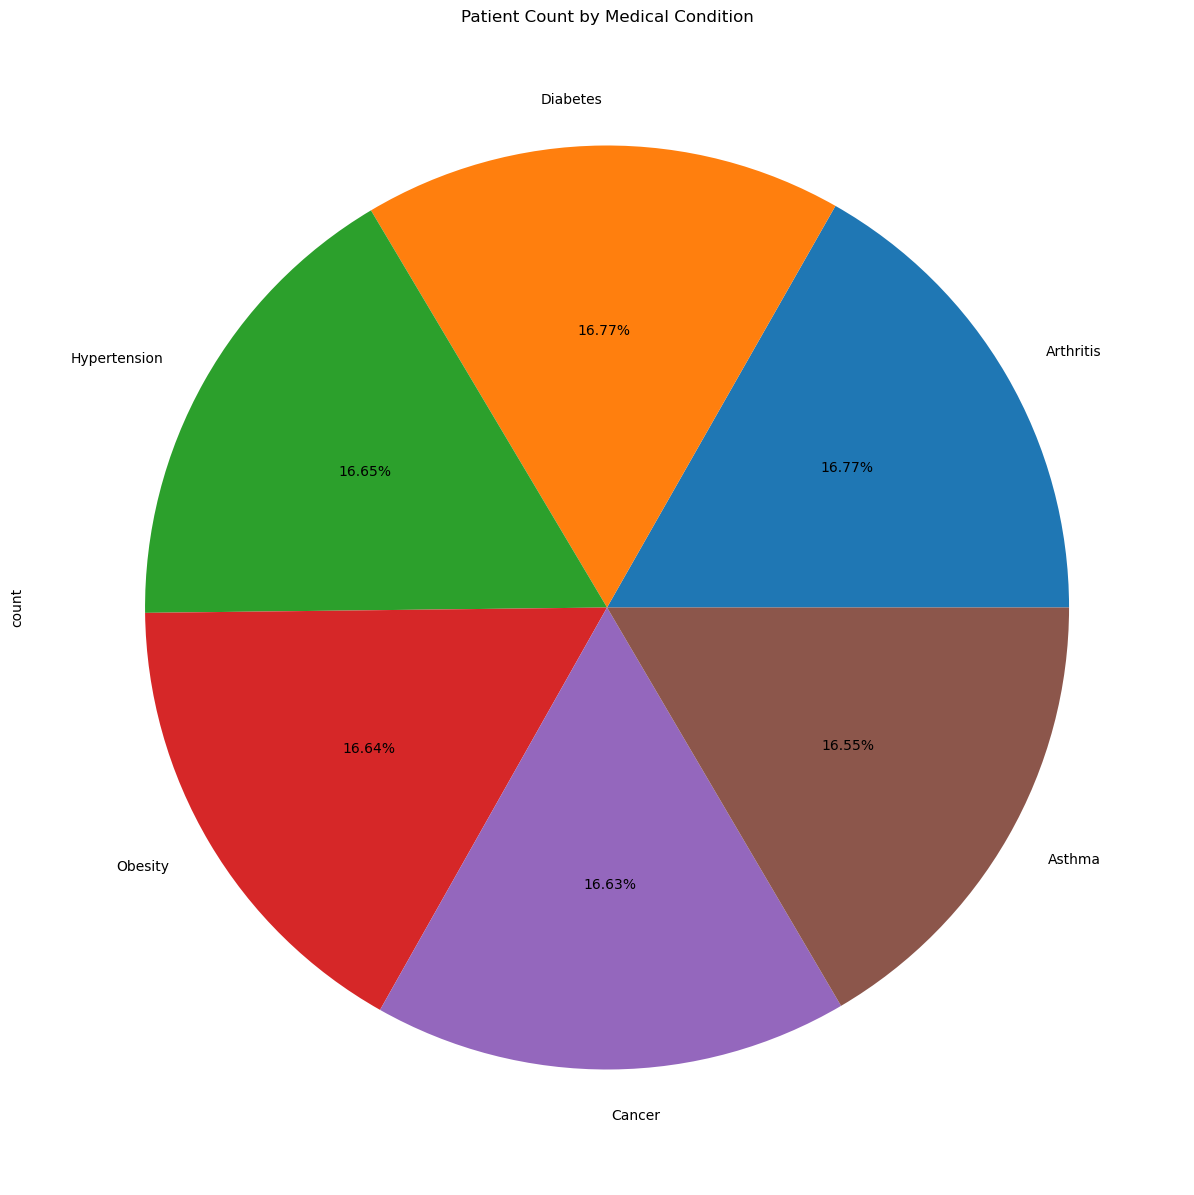

In [28]:
# Piechart of Patient Count by Medical Condition
df_health['Medical Condition'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title('Patient Count by Medical Condition')
plt.show()

## Insights


1. **Even Distribution:**  
   The proportions for all categories (Diabetes, Arthritis, Hypertension, Obesity, Cancer, Asthma) are very similar, each close to 16–17%. This suggests that the dataset is evenly distributed across these six health conditions.

2. **No Dominant Category:**  
   No single condition overwhelmingly dominates the dataset. Arthritis (16.77%) and Diabetes (16.76%) are the highest, but the difference between the largest and smallest category is less than 0.2%.

3. **Balanced Sample:**  
   This kind of balance in the data is valuable for comparative studies, as no category is underrepresented or overrepresented.

4. **Potential for Fair Analysis:**  
   Since the data is distributed almost equally, results or conclusions drawn for one health condition will likely not be biased by sample size differences.



<function matplotlib.pyplot.show(close=None, block=None)>

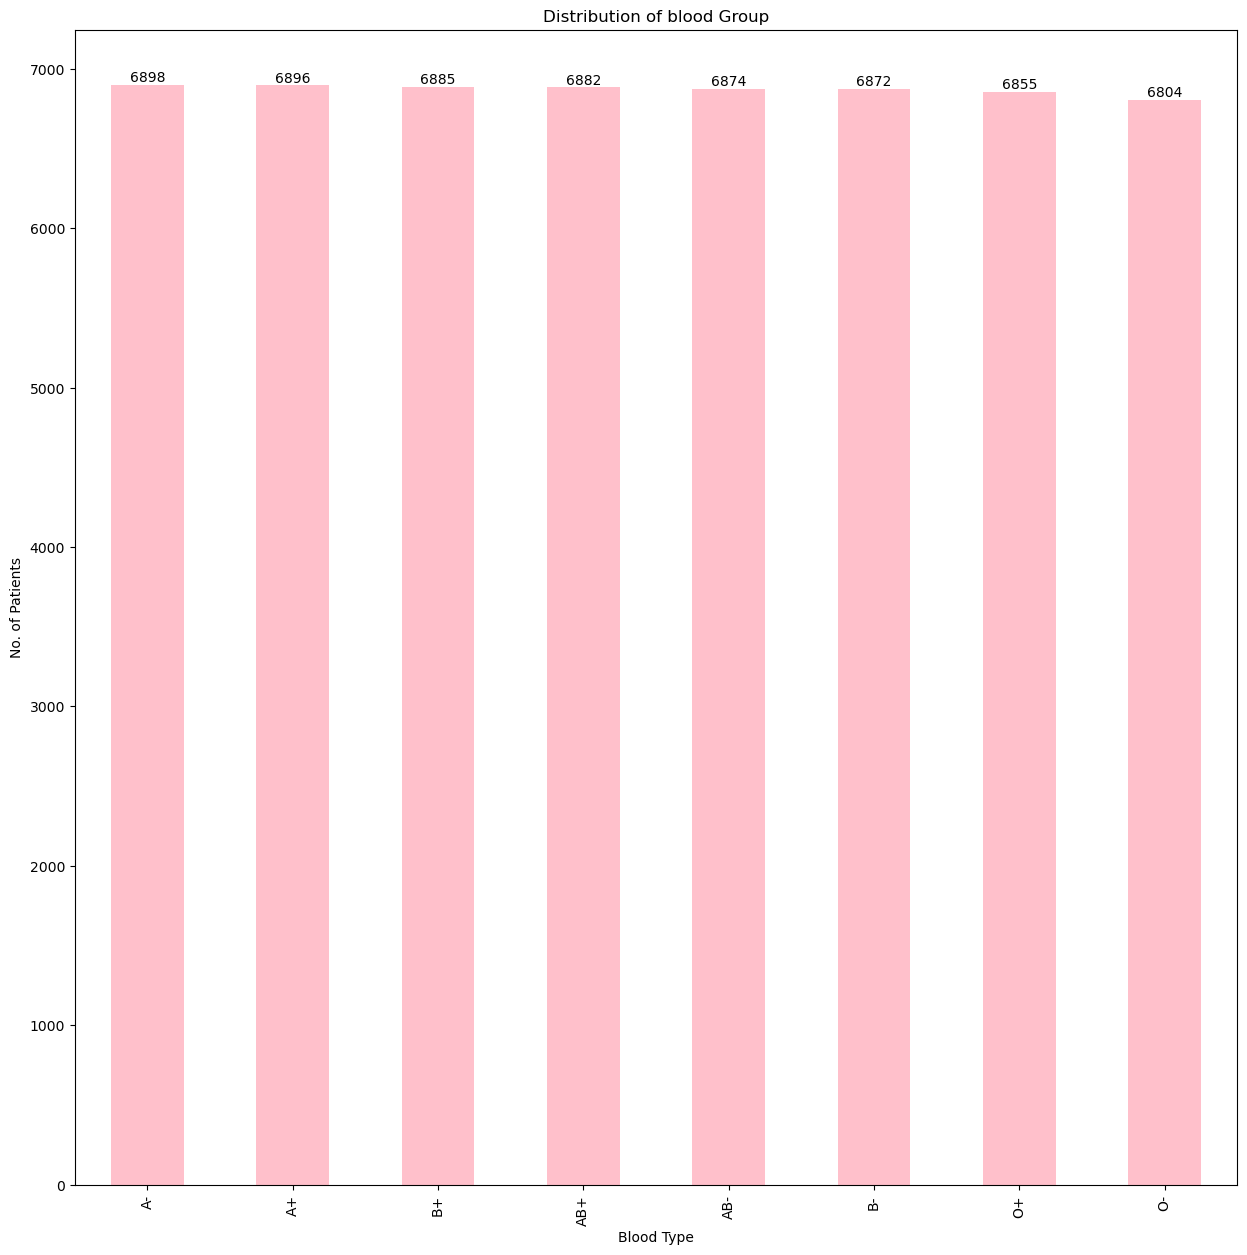

In [29]:
# Bargraph of Distribution of Blood Group
ax=df_health['Blood Type'].value_counts().plot(kind='bar',color= 'pink')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Distribution of blood Group')
plt.xlabel('Blood Type')
plt.ylabel('No. of Patients')
plt.show

## Insights from Bar Graph

1. **Uniform Distribution:**  
   All blood groups (A+, A-, AB+, AB-, B+, B-, O+, O-) have nearly equal counts, ranging from about 6804 to 6898 each. This indicates an artificially balanced dataset rather than reflecting real-world blood group frequencies.

2. **No Dominant Blood Group:**  
   No single blood type is significantly more prevalent than the others; differences between groups are very small (less than 100).

3. **Suitable for Comparative Analysis:**  
   Since all blood types are almost equally represented, this dataset allows for fair and unbiased comparisons between groups.

4. **Potential Synthetic Data:**  
   The near-identical counts across all types suggest this dataset may be simulated or balanced for analytical purposes; real-world distributions usually vary widely by blood group.



<function matplotlib.pyplot.show(close=None, block=None)>

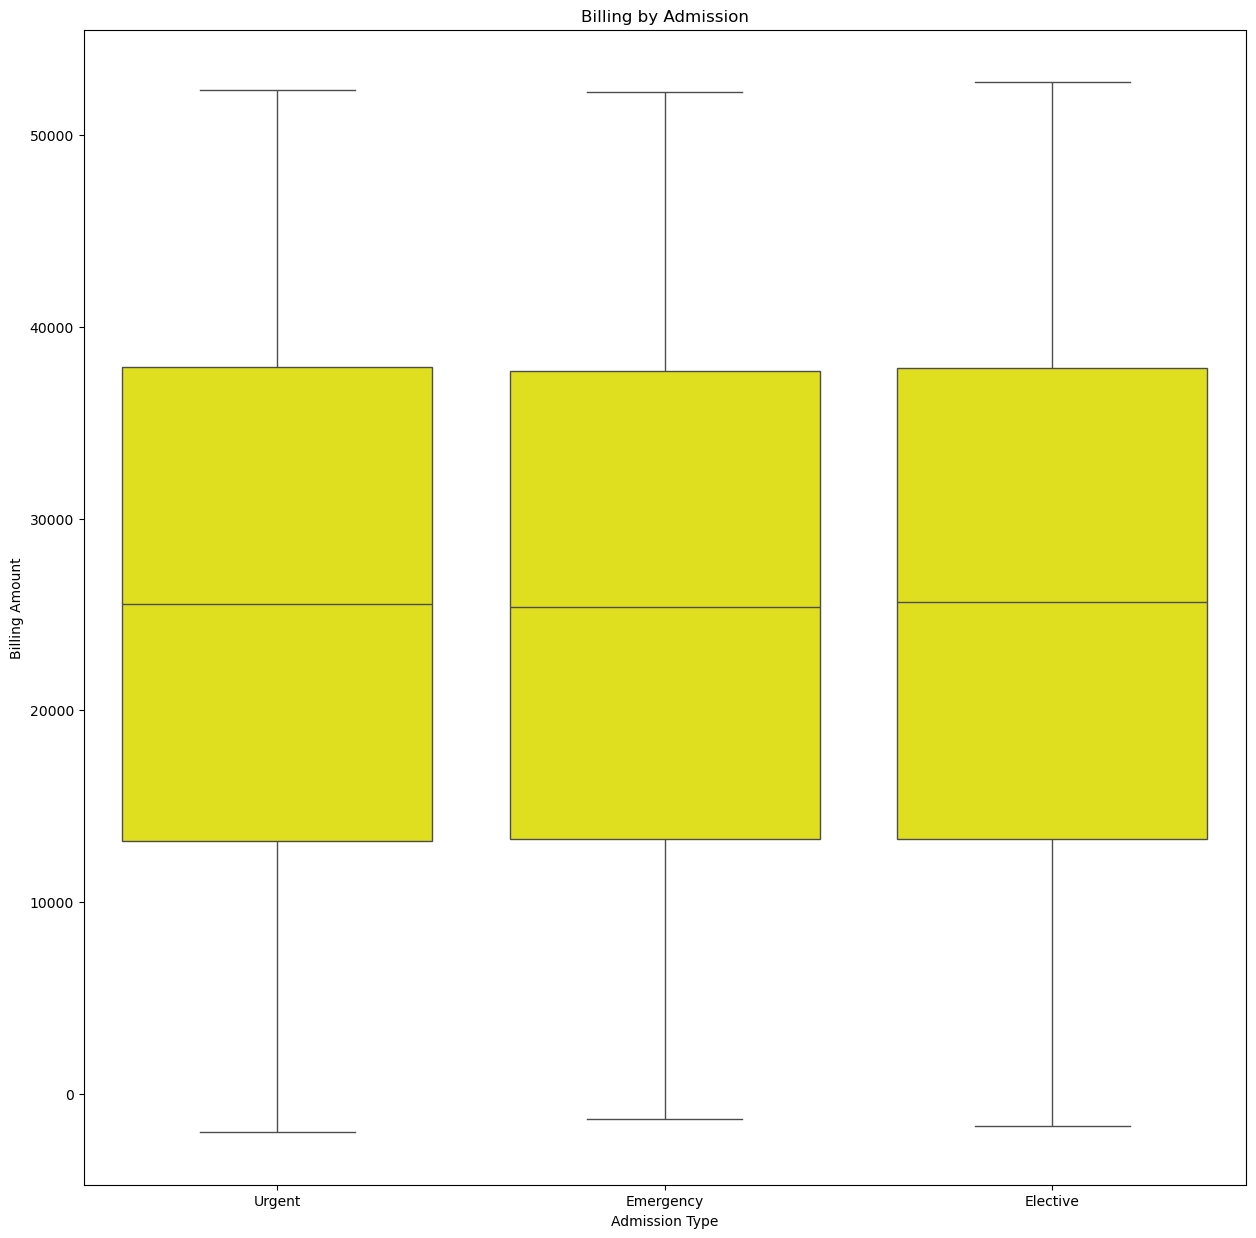

In [30]:
# Boxplot Billing by Admission
sns.boxplot(data= df_health,x='Admission Type',y='Billing Amount',color='Yellow')
plt.title('Billing by Admission')
plt.show

## Insights
 **Boxplot of Billing by Admission Type**:

1. **Similar Distributions Across Admission Types:**  
   The billing amounts for Urgent, Emergency, and Elective admissions all show very similar distributions. The median, spread, and range for the billing amounts are nearly identical across all three categories.

2. **Wide Range of Billing Amounts:**  
   Billing amounts vary widely—from close to zero up to about 53,000. This indicates there is significant variability in billing regardless of admission type.

3. **No Apparent Outliers:**  
   There are no extreme outliers shown (no dots beyond the whiskers), suggesting that most billing values are within a reasonable range for each category.

4. **Median Billing Amount:**  
   The median billing amount (center line of each box) looks to be around 25,000 for all admission types.

5. **Symmetrical Spread:**  
   The interquartile ranges (IQR, shown by the box heights) and whiskers for all admission types are almost identical, pointing to a consistent billing pattern across different admission types in the dataset.



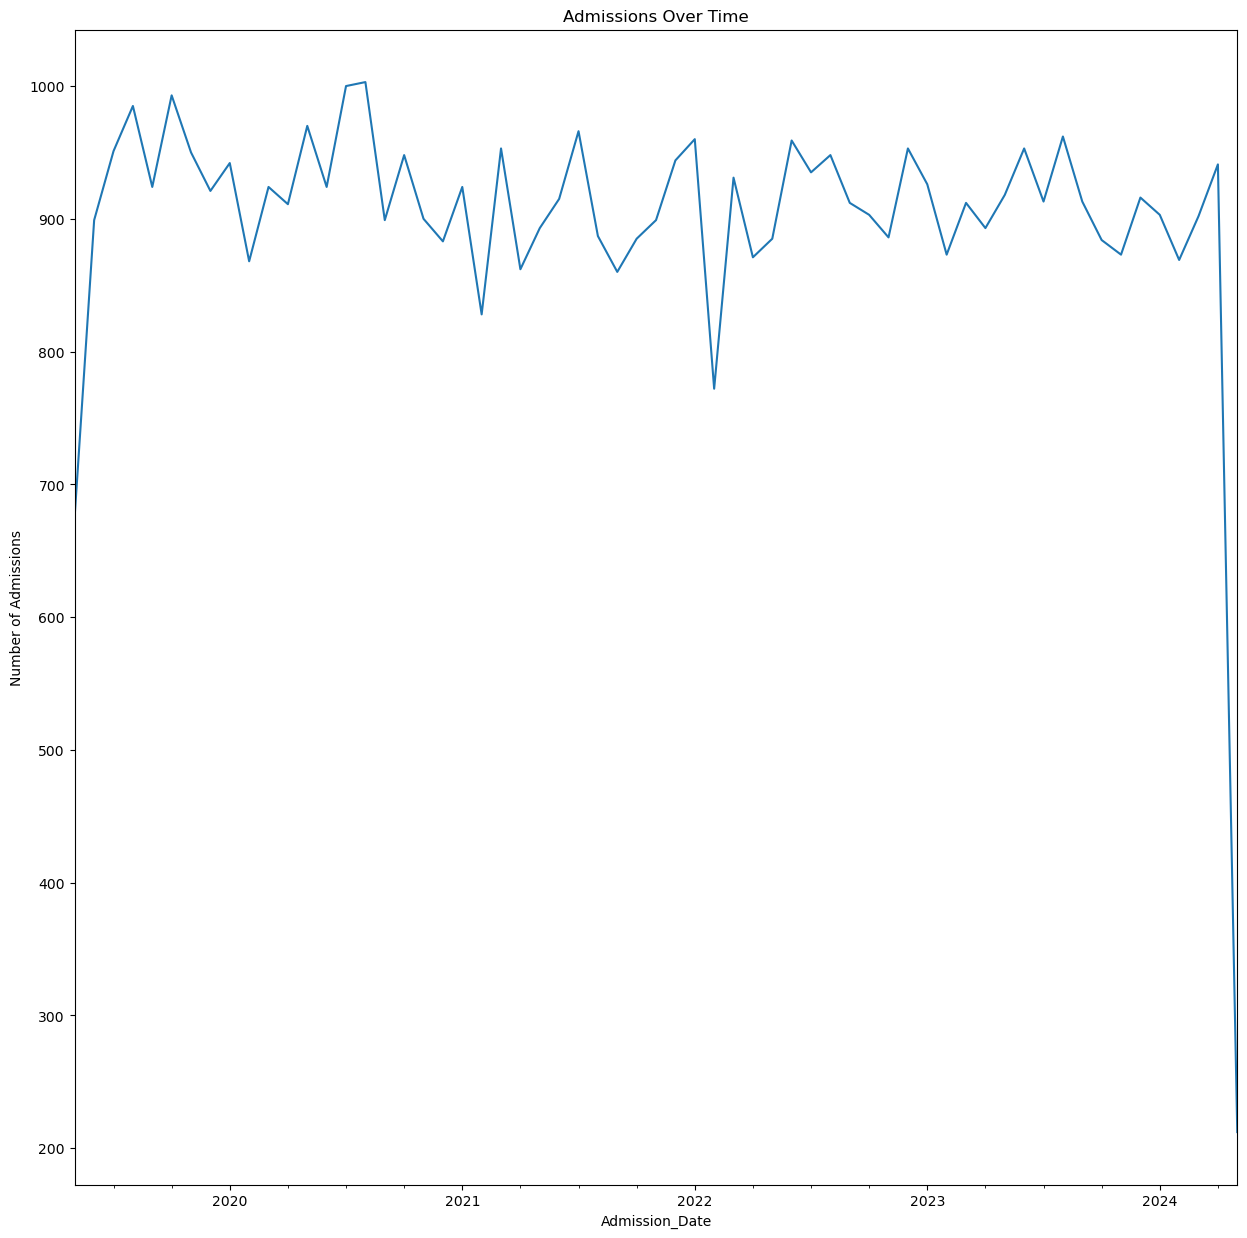

In [31]:
# Line graph for Admission Over Time
ax=df_health['Admission_Date'] = pd.to_datetime(df_health['Addmission_Year'].astype(str) + '-' + df_health['Addmission_Month'].astype(str))
df_health.groupby('Admission_Date').size().plot()
plt.title('Admissions Over Time')
plt.ylabel('Number of Admissions')
plt.show()


## Insights
**Line graph of Admissions Over Time** (2020–2024):

1. **Overall Stability:**  
   Admissions numbers are generally stable from 2020 onwards, staying mostly in the range of 900–1000 per period. There are no major upward or downward trends, except for fluctuations.

2. **Initial Increase:**  
   There’s a noticeable jump in admissions at the beginning (2020 to 2021), from around 700 up to 900–1000. After this initial increase, numbers level off.

3. **Minor Fluctuations:**  
   There are periodic dips and spikes (e.g., a sudden drop below 800 in one period), but admissions quickly recover, showing resilience and consistency in the system.

4. **No Long-Term Growth or Decline:**  
   After the first year, admissions do not show any significant long-term increase or decrease—they remain quite steady over the years.

5. **Possible Seasonality or Data Issues:**  
   While most data points are stable, there’s a sharp drop at the end (2024), which may suggest incomplete data for the latest period, end-of-year reporting effects, or another anomaly.


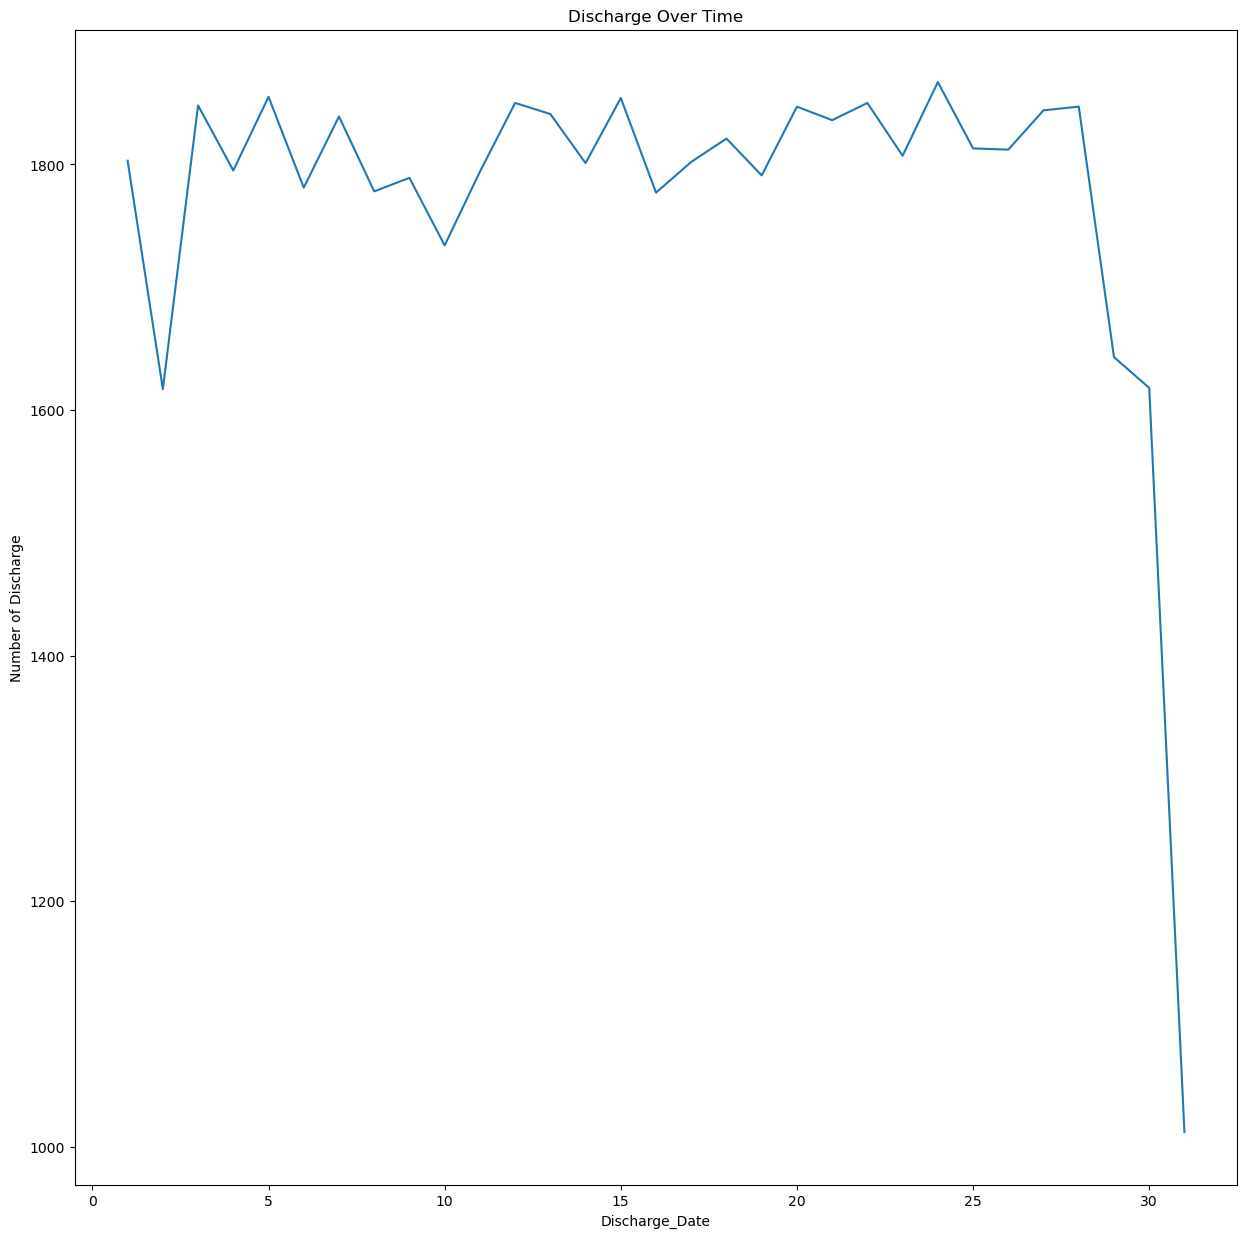

In [32]:
# Line Graph of Discharge Over Time
ax=df_health['Dicharge_Date'] = pd.to_datetime(df_health['Discharge_Year'].astype(str) + '-' + df_health['Discharge_Month'].astype(str))
df_health.groupby('Discharge_Date').size().plot()
plt.title('Discharge Over Time')
plt.ylabel('Number of Discharge')
plt.show()


## Insights

1. **Overall High and Consistent Discharges:**  
   For most of the month, the number of discharges remains high and relatively stable, fluctuating around 1800–1900 per day.

2. **Sudden Drops at Month End:**  
   There is a noticeable and sharp decline in the number of discharges on the last few days, with the lowest value dropping to around 1000 on the final day. This suggests either a systematic factor (like data entry cut-off, end-of-month effects, or operational changes) or missing/incomplete records for these days.

3. **General Stability:**  
   Despite day-to-day fluctuations, the discharge volume doesn’t show a significant upward or downward trend; it’s mostly flat with minor variations in the mid- and early-month periods.

4. **Possible Data Quality Issue:**  
   The sharp drop right at the end is unusual compared to the rest of the month and may indicate missing data, reporting delays, or an external factor affecting discharges for those dates.

5. **No Apparent Seasonality:**  
   There are no clear patterns of cyclical changes or weekly peaks/troughs across the month—the numbers are steady until the abrupt fall.



<function matplotlib.pyplot.show(close=None, block=None)>

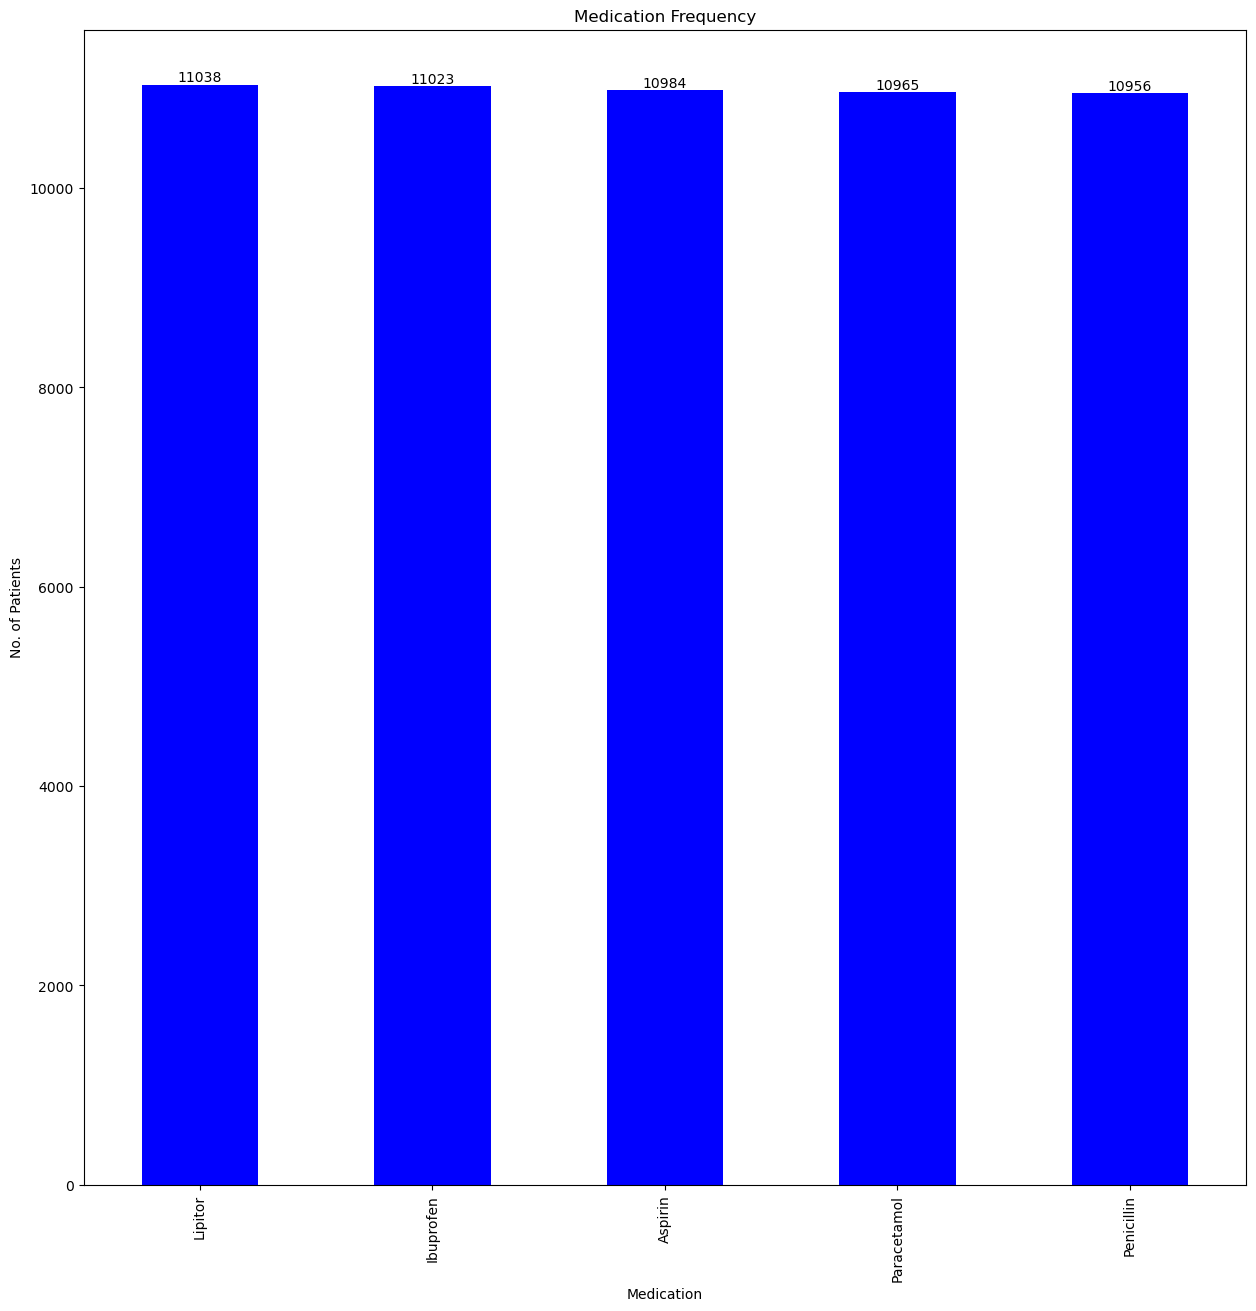

In [33]:
# Bargraph of Medication Frequency
ax= df_health['Medication'].value_counts().plot(kind='bar',color= 'Blue')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Medication Frequency')
plt.xlabel('Medication')
plt.ylabel('No. of Patients')
plt.show

## Insights

1. **Medications Are Almost Equally Prescribed:**  
   The five medications—Lipitor, Ibuprofen, Aspirin, Paracetamol, and Penicillin—have very similar numbers of patients, all in the range of 10,956 to 11,038. This shows a very balanced usage across these commonly prescribed drugs.

2. **No Dominant Medication:**  
   Lipitor has the highest count (11,038), but the difference between the most and least prescribed drugs is just 82 patients. There is no overwhelming preference for a particular medication in this dataset.

3. **Uniform Patient Distribution:**  
   The data indicates a nearly identical distribution of patients across all five medications. This balances out sample sizes, reducing bias in any comparative analysis.

4. **Potentially Synthetic or Balanced Sample:**  
   Such close counts may suggest that the data was intentionally balanced or sampled to avoid skew, which is not typical of real-world medication patterns (actual distributions could vary more significantly).



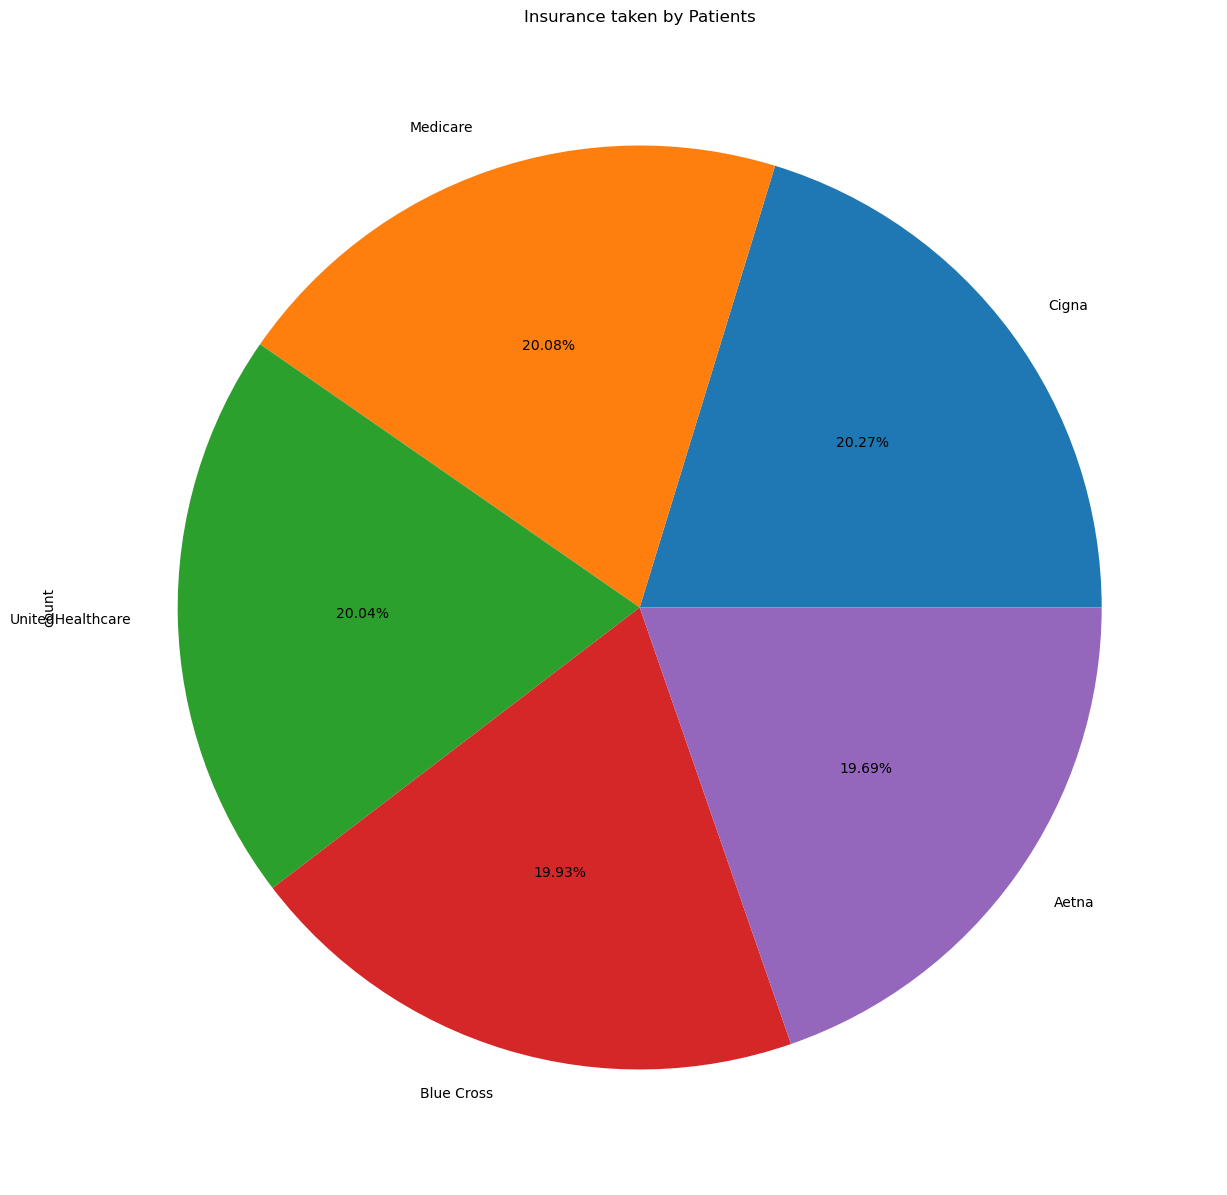

In [34]:
# Pie chart of Insurance taken by Patients
df_health['Insurance Provider'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title('Insurance taken by Patients')
plt.show()

## Insights


1. **Near-Equal Distribution:**  
   All five insurance providers—Cigna, Medicare, UnitedHealthcare, Blue Cross, and Aetna—have nearly the same share, each close to 20%. The differences between them are minimal (ranging from about 19.66% to 20.27%).

2. **No Dominant Provider:**  
   No single insurance company has a noticeably larger or smaller share. Cigna has the highest proportion (20.27%), but it is only slightly ahead of the others.

3. **Balanced Dataset:**  
   The nearly equal representation suggests the dataset is well-balanced with respect to insurance types. This minimizes bias and allows fair comparisons across insurance categories.

4. **Potentially Curated or Synthetic Data:**  
   Such uniformity is unusual in real-world scenarios, where some insurance providers typically have a larger market share. The chart may reflect intentionally balanced or sample data.



<function matplotlib.pyplot.show(close=None, block=None)>

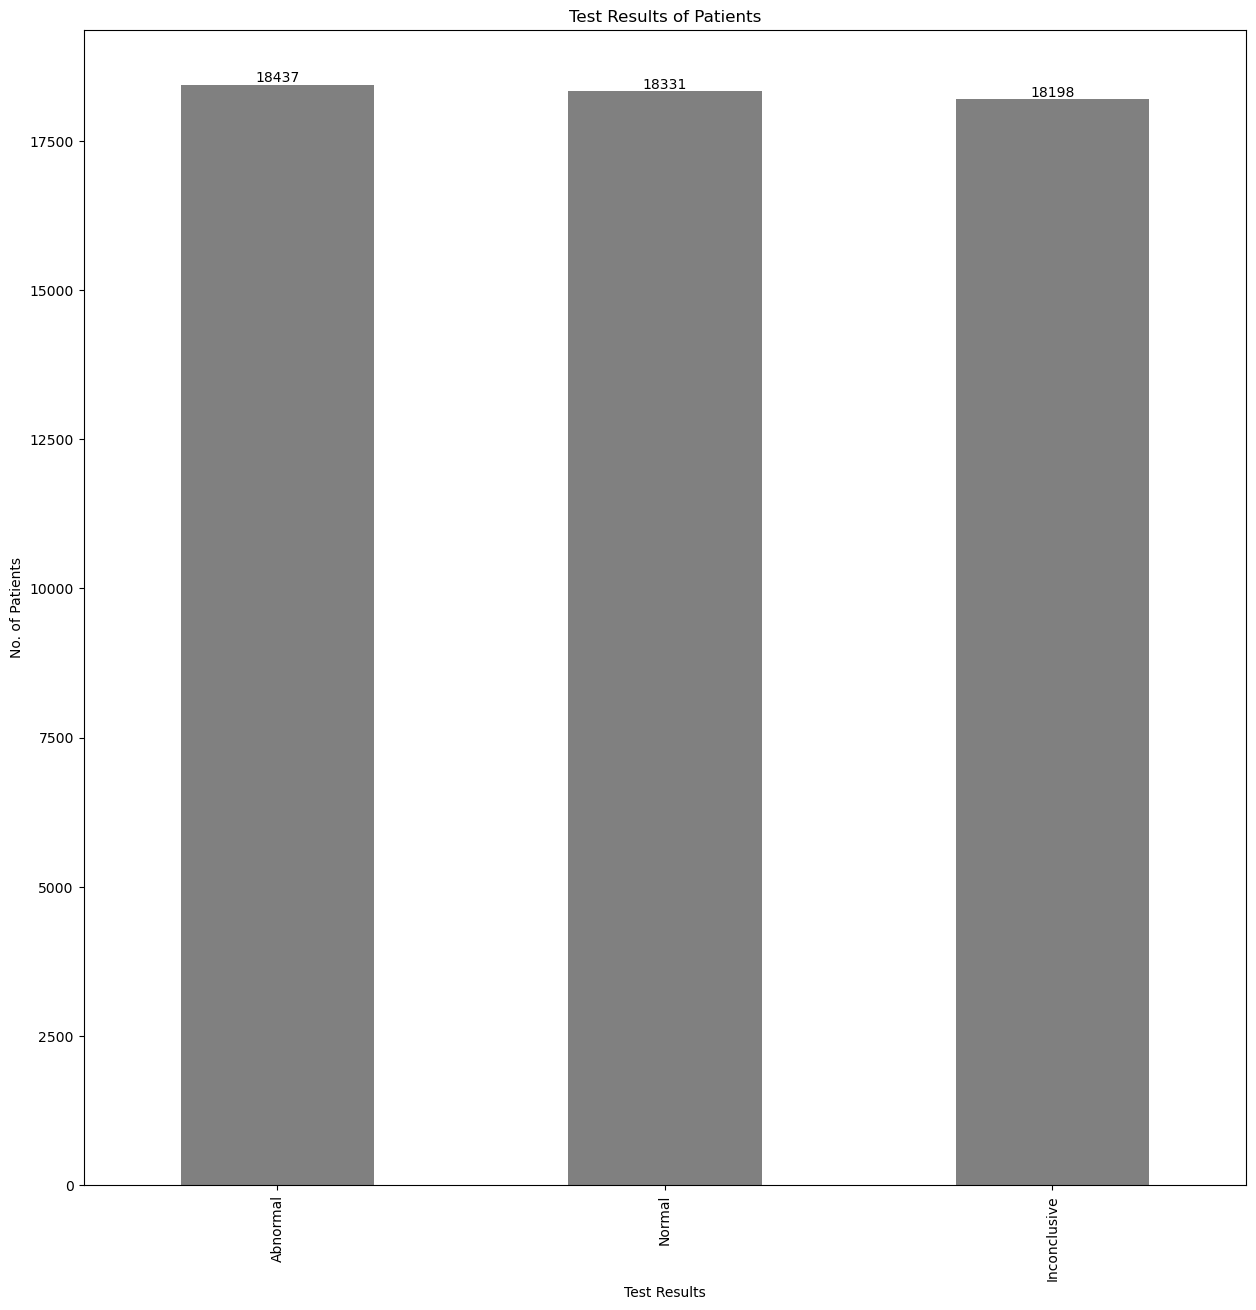

In [35]:
# Bargraph of Test Results of Patients
ax=df_health['Test Results'].value_counts().plot(kind='bar',color= 'Grey')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Test Results of Patients')
plt.xlabel('Test Results')
plt.ylabel('No. of Patients')
plt.show

## Insights

1. **Nearly Equal Distribution:**  
   The number of patients in each test result category is almost the same:
   - Abnormal: 18,437
   - Normal: 18,331
   - Inconclusive: 18,198  
   The variation between categories is less than 300, suggesting no category is significantly over- or under-represented.

2. **No Dominant Category:**  
   None of the result groups stands out as being overwhelmingly larger or smaller than the others.

3. **Balanced Dataset:**  
   This evenly distributed sample is ideal for comparative analysis—bias regarding group size is minimized, making any statistical comparisons more robust.

4. **Possible Synthetic or Curated Data:**  
   Such uniformity is uncommon in real-world settings, where "Normal" results often outnumber "Abnormal" and "Inconclusive." This might indicate the data has been balanced or is synthetic for the purpose of analysis.



<function matplotlib.pyplot.show(close=None, block=None)>

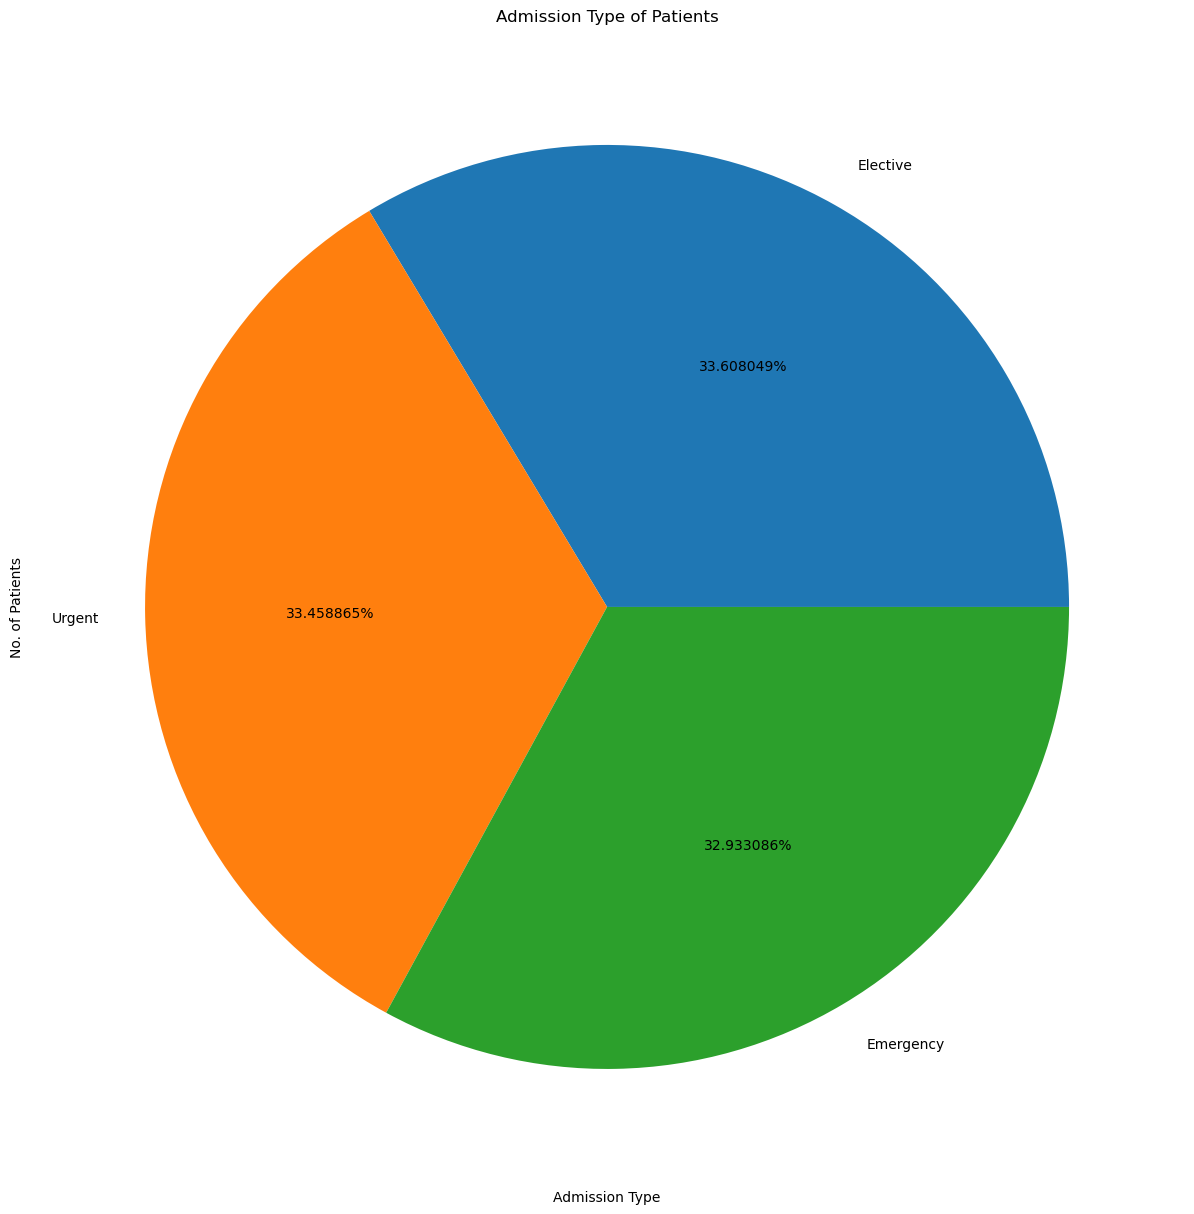

In [36]:
# Pie char of Admission Type of Patients
ax=df_health['Admission Type'].value_counts().plot(kind='pie',autopct='%2f%%')
plt.title('Admission Type of Patients')
plt.xlabel('Admission Type')
plt.ylabel('No. of Patients')
plt.show

## Insights
1. **Even Distribution Between Admission Types:**  
   The pie chart shows that the proportions of Elective, Urgent, and Emergency admissions are very close:  
   - Elective: ~33.6%
   - Urgent: ~32.9%
   - Emergency: ~33.4%  
   This suggests there is no major dominance of any single admission type in the dataset.

2. **Balanced Hospital Workload:**  
   With almost equal shares among Elective, Urgent, and Emergency cases, the hospital likely manages similar volumes of planned (Elective) and unplanned (Urgent/Emergency) admissions.

3. **No Major Skew:**  
   The dataset appears balanced, meaning analytical results about admission types won’t be skewed due to over- or under-representation of any category.

4. **Good for Fair Comparisons:**  
   This kind of distribution is ideal for comparing outcomes or resource allocation among different admission types, since sample sizes are nearly the same.



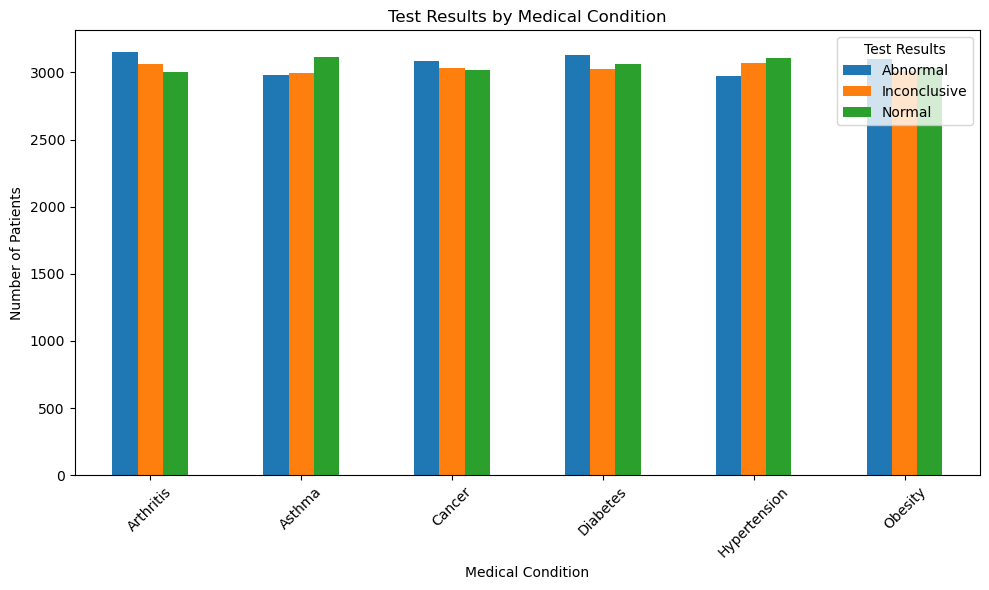

In [37]:
# The Bar Chart of Test Results by Medical Condition, Crosstab of Test Results vs Medical Conditions
ct_condition = pd.crosstab(df_health['Medical Condition'], df_health['Test Results'])
ct_condition.plot(kind='bar', figsize=(10,6))
plt.title('Test Results by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights
1. **Similar Number of Patients Across Test Results:**
   - For each medical condition (Arthritis, Asthma, Cancer, Diabetes, Hypertension, Obesity), the numbers of patients with Abnormal, Inconclusive, and Normal test results are very similar—most bars are almost equal in height.

2. **No Strong Disparity Between Test Result Types:**
   - There is no medical condition where one test result (Abnormal, Inconclusive, or Normal) is dramatically higher or lower than the others.

3. **Homogeneous Patient Distribution:**
   - The consistent numbers suggest that, for the conditions shown, patients are almost equally likely to have abnormal, inconclusive, or normal results.

4. **Potential Balanced or Synthetic Dataset:**
   - Such uniformity across both test result types and medical conditions is unusual in real-world data and may indicate the dataset was curated or balanced for analysis.

5. **No Clear Condition-Specific Trend:**
   - None of the medical conditions stands out as having generally worse (more abnormal) or better (more normal) results.

